In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta as ta
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import torch
import torch.nn as nn
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.tuner import Tuner


from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler


mm = MinMaxScaler()
ss = StandardScaler()

#https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#https://www.kaggle.com/code/iamleonie/time-series-forecasting-building-intuition/notebook?scriptVersionId=52169438

In [2]:
#ticker = "^TNX"
start=pd.to_datetime('2000-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')


#EURUSD = "EURUSD=X"
#USDJPY = "USDJPY=X"

#13 WEEK TREASURY BILL ="^IRX"
#Treasury Yield 5 Years ="^FVX"
#CBOE Interest Rate 10 Year= "^TNX"
#Treasury Yield 30 Years ="^TYX"

#S&P 500 = "^GSPC"
#Nikkei 225= "^N225"

#Crude Oil="CL=F"


In [3]:
# download daily stock price data by passing in specified ticker and date range

#df = yf.download(ticker,start,end=today_date)

In [4]:
#fig = go.Figure(data=go.Scatter(x=df.index,y=df['Close'],mode='lines'))
#fig.show()

In [5]:
'''

#Download data for indicators available on Yahoo Finance

yahoo_indicators = ['USDJPY=X','^GSPC','^N225'] 
tickers = yf.Tickers(yahoo_indicators)
df = tickers.history(start=start,end=today_date,interval='1D',)
df

#https://www.qmr.ai/yfinance-library-the-definitive-guide/#Fetch_Historical_Prices_using_yfinance

'''

"\n\n#Download data for indicators available on Yahoo Finance\n\nyahoo_indicators = ['USDJPY=X','^GSPC','^N225'] \ntickers = yf.Tickers(yahoo_indicators)\ndf = tickers.history(start=start,end=today_date,interval='1D',)\ndf\n\n#https://www.qmr.ai/yfinance-library-the-definitive-guide/#Fetch_Historical_Prices_using_yfinance\n\n"

In [6]:
#df.drop(columns=['Dividends', 'Open','High','Low','Stock Splits','Volume'],inplace=True)

In [7]:
#df= df.droplevel(0, axis=1)

In [8]:
#df.rename(columns={"USDJPY=X": "USDJPY", "^GSPC": "S&P", "^IRX": "US3M", "^N225": "Nikkei225"},inplace=True)
#df

In [9]:
#df = df.rename_axis('Date').reset_index()

In [10]:
#df['Date'] = pd.to_datetime(df['Date'])

In [11]:
#df

In [12]:
'''
US core CPI (monthly)
https://fred.stlouisfed.org/series/CORESTICKM157SFRBATL

US core CPI (yearly)
https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL

US core-core CPI (monthly)
https://fred.stlouisfed.org/series/CRESTKCPIXSLTRM157SFRBATL

US core-core CPI (yearly)
https://fred.stlouisfed.org/series/CRESTKCPIXSLTRM159SFRBATL

Japan National Consumer Price Index (CPI) YoY
https://www.investing.com/economic-calendar/national-cpi-992
    
'''




'\nUS core CPI (monthly)\nhttps://fred.stlouisfed.org/series/CORESTICKM157SFRBATL\n\nUS core CPI (yearly)\nhttps://fred.stlouisfed.org/series/CORESTICKM159SFRBATL\n\nUS core-core CPI (monthly)\nhttps://fred.stlouisfed.org/series/CRESTKCPIXSLTRM157SFRBATL\n\nUS core-core CPI (yearly)\nhttps://fred.stlouisfed.org/series/CRESTKCPIXSLTRM159SFRBATL\n\nJapan National Consumer Price Index (CPI) YoY\nhttps://www.investing.com/economic-calendar/national-cpi-992\n    \n'

In [13]:
#https://www.investing.com/rates-bonds/u.s.-2-year-bond-yield-historical-data

# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
USDJPY_file_path = '/Users/benny/Downloads/USD_JPY Historical Data.csv'

# Use pandas to read the Excel file
USDJPY_df = pd.read_csv(USDJPY_file_path)

# Print the dataframe to verify it was read correctly
#print(USDJPY_df)

USDJPY_df['Date'] = pd.to_datetime(USDJPY_df['Date'], format='mixed')
#US2y_df.set_index('Date',inplace=True)
#US2y_df.sort_index(ascending=True,inplace=True)
USDJPY_df.drop(['Open','High','Low','Change %','Vol.'], axis=1, inplace=True)
USDJPY_df.rename(columns={"Price": "USDJPY_df"},inplace=True)
print(USDJPY_df)

           Date  USDJPY_df
0    2024-06-03     157.09
1    2024-06-02     157.18
2    2024-05-31     157.31
3    2024-05-30     156.81
4    2024-05-29     157.60
...         ...        ...
4802 2006-01-06     114.42
4803 2006-01-05     115.89
4804 2006-01-04     115.98
4805 2006-01-03     116.19
4806 2006-01-02     117.95

[4807 rows x 2 columns]


In [15]:
#https://www.investing.com/rates-bonds/u.s.-2-year-bond-yield-historical-data

# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
SP500_file_path = '/Users/benny/Downloads/S&P 500 Historical Data.csv'

# Use pandas to read the Excel file
SP500_df = pd.read_csv(SP500_file_path)

# Print the dataframe to verify it was read correctly
#print(SP500_df)

SP500_df['Date'] = pd.to_datetime(SP500_df['Date'], format='mixed')
#US2y_df.set_index('Date',inplace=True)
#US2y_df.sort_index(ascending=True,inplace=True)
SP500_df.drop(['Open','High','Low','Change %','Vol.'], axis=1, inplace=True)
SP500_df.rename(columns={"Price": "SP500_df"},inplace=True)

SP500_df['SP500_df'] = SP500_df['SP500_df'].str.replace(",", "")
SP500_df[['SP500_df']] = SP500_df[['SP500_df']].apply(pd.to_numeric)
#SP500_df.convert_dtypes().dtypes 
print(SP500_df)

           Date  SP500_df
0    2024-05-31   5277.51
1    2024-05-30   5235.48
2    2024-05-29   5266.95
3    2024-05-28   5306.04
4    2024-05-24   5304.72
...         ...       ...
4629 2006-01-09   1290.20
4630 2006-01-06   1285.50
4631 2006-01-05   1273.50
4632 2006-01-04   1273.50
4633 2006-01-03   1268.80

[4634 rows x 2 columns]


In [17]:
#https://www.investing.com/rates-bonds/u.s.-2-year-bond-yield-historical-data

# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
Nikkei225_file_path = '/Users/benny/Downloads/Nikkei 225 Historical Data.csv'

# Use pandas to read the Excel file
Nikkei225_df = pd.read_csv(Nikkei225_file_path)

# Print the dataframe to verify it was read correctly
#print(Nikkei225_df)

Nikkei225_df['Date'] = pd.to_datetime(Nikkei225_df['Date'], format='mixed')
#US2y_df.set_index('Date',inplace=True)
#US2y_df.sort_index(ascending=True,inplace=True)
Nikkei225_df.drop(['Open','High','Low','Change %','Vol.'], axis=1, inplace=True)
Nikkei225_df.rename(columns={"Price": "Nikkei225_df"},inplace=True)

Nikkei225_df['Nikkei225_df'] = Nikkei225_df['Nikkei225_df'].str.replace(",", "")
Nikkei225_df[['Nikkei225_df']] = Nikkei225_df[['Nikkei225_df']].apply(pd.to_numeric)
print(Nikkei225_df)

           Date  Nikkei225_df
0    2024-06-03      38861.50
1    2024-05-31      38487.90
2    2024-05-30      38054.13
3    2024-05-29      38556.87
4    2024-05-28      38855.37
...         ...           ...
4530 2006-01-11      16363.59
4531 2006-01-10      16124.35
4532 2006-01-06      16428.21
4533 2006-01-05      16425.37
4534 2006-01-04      16361.54

[4535 rows x 2 columns]


In [19]:
#https://www.investing.com/rates-bonds/u.s.-2-year-bond-yield-historical-data

# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
US2y_file_path = '/Users/benny/Downloads/United States 2-Year Bond Yield Historical Data.csv'

# Use pandas to read the Excel file
US2y_df = pd.read_csv(US2y_file_path)

# Print the dataframe to verify it was read correctly
#print(US2y_df)

US2y_df['Date'] = pd.to_datetime(US2y_df['Date'], format='mixed')
#US2y_df.set_index('Date',inplace=True)
#US2y_df.sort_index(ascending=True,inplace=True)
US2y_df.drop(['Open','High','Low','Change %'], axis=1, inplace=True)
US2y_df.rename(columns={"Price": "US2y_df"},inplace=True)
print(US2y_df)

           Date  US2y_df
0    2024-05-31    4.919
1    2024-05-30    4.927
2    2024-05-29    4.975
3    2024-05-28    4.978
4    2024-05-27    4.935
...         ...      ...
4807 2006-01-09    4.353
4808 2006-01-06    4.366
4809 2006-01-05    4.325
4810 2006-01-04    4.304
4811 2006-01-03    4.333

[4812 rows x 2 columns]


In [20]:
#https://www.investing.com/rates-bonds/japan-2-year-bond-yield-historical-data

# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
JP2y_file_path = '/Users/benny/Downloads/Japan 2-Year Bond Yield Historical Data.csv'

# Use pandas to read the Excel file
JP2y_df = pd.read_csv(JP2y_file_path)

# Print the dataframe to verify it was read correctly
#print(JP2y_df)

JP2y_df['Date'] = pd.to_datetime(JP2y_df['Date'], format='mixed')
#JP2y_df.set_index('Date',inplace=True)
#JP2y_df.sort_index(ascending=True,inplace=True)
JP2y_df.drop(['Open','High','Low','Change %'], axis=1, inplace=True)
JP2y_df.rename(columns={"Price": "JP2y_df"},inplace=True)
print(JP2y_df)

           Date  JP2y_df
0    2024-05-30    0.377
1    2024-05-29    0.376
2    2024-05-28    0.350
3    2024-05-27    0.345
4    2024-05-26    0.333
...         ...      ...
4922 2006-07-26    0.839
4923 2006-07-25    0.849
4924 2006-07-24    0.824
4925 2006-07-21    0.794
4926 2006-07-20    0.794

[4927 rows x 2 columns]


In [ ]:
#JP2y_df.plot(figsize=(10, 6));

In [21]:
df = USDJPY_df.merge(SP500_df, on='Date', how='left')
df = df.merge(Nikkei225_df, on='Date', how='left')
df = df.merge(US2y_df, on='Date', how='left')
df = df.merge(JP2y_df, on='Date', how='left')

In [22]:
df

,Date,USDJPY_df,SP500_df,Nikkei225_df,US2y_df,JP2y_df
0,2024-06-03,157.09,NaN,38861.50,NaN,NaN
1,2024-06-02,157.18,NaN,NaN,NaN,NaN
2,2024-05-31,157.31,5277.51,38487.90,4.919,NaN
3,2024-05-30,156.81,5235.48,38054.13,4.927,0.377
4,2024-05-29,157.60,5266.95,38556.87,4.975,0.376
...,...,...,...,...,...,...
4802,2006-01-06,114.42,1285.50,16428.21,4.366,NaN
4803,2006-01-05,115.89,1273.50,16425.37,4.325,NaN
4804,2006-01-04,115.98,1273.50,16361.54,4.304,NaN
4805,2006-01-03,116.19,1268.80,NaN,4.333,NaN


In [23]:
df.sort_values(by='Date', ascending=True,inplace=True)
df.set_index('Date',inplace=True)
df = df.fillna(method="ffill")
df.dropna(inplace=True)

In [24]:
df

,USDJPY_df,SP500_df,Nikkei225_df,US2y_df,JP2y_df
Date,,,,,
2006-07-20,117.03,1249.10,14946.84,5.068,0.794
2006-07-21,116.15,1240.30,14821.26,5.089,0.794
2006-07-24,116.67,1260.90,14794.50,5.093,0.824
2006-07-25,117.18,1268.90,15005.24,5.123,0.849
2006-07-26,116.29,1268.40,14884.07,5.075,0.839
...,...,...,...,...,...
2024-05-29,157.60,5266.95,38556.87,4.975,0.376
2024-05-30,156.81,5235.48,38054.13,4.927,0.377
2024-05-31,157.31,5277.51,38487.90,4.919,0.377


In [25]:
df['USDJPY_delta'] = np.log(df['USDJPY_df']/df['USDJPY_df'].shift(1))
df['S&P_delta'] = np.log(df['SP500_df']/df['SP500_df'].shift(1))
df['Nikkei225_delta'] = np.log(df['Nikkei225_df']/df['Nikkei225_df'].shift(1))
df['US2y_df_delta'] = df['US2y_df']-df['US2y_df'].shift(1)
df['JP2y_df_delta'] = df['JP2y_df']-df['JP2y_df'].shift(1)

In [26]:
df

,USDJPY_df,SP500_df,Nikkei225_df,US2y_df,JP2y_df,USDJPY_delta,S&P_delta,Nikkei225_delta,US2y_df_delta,JP2y_df_delta
Date,,,,,,,,,,
2006-07-20,117.03,1249.10,14946.84,5.068,0.794,NaN,NaN,NaN,NaN,NaN
2006-07-21,116.15,1240.30,14821.26,5.089,0.794,-0.007548,-0.007070,-0.008437,0.021,0.000
2006-07-24,116.67,1260.90,14794.50,5.093,0.824,0.004467,0.016472,-0.001807,0.004,0.030
2006-07-25,117.18,1268.90,15005.24,5.123,0.849,0.004362,0.006325,0.014144,0.030,0.025
2006-07-26,116.29,1268.40,14884.07,5.075,0.839,-0.007624,-0.000394,-0.008108,-0.048,-0.010
...,...,...,...,...,...,...,...,...,...,...
2024-05-29,157.60,5266.95,38556.87,4.975,0.376,0.002796,-0.007394,-0.007712,-0.003,0.026
2024-05-30,156.81,5235.48,38054.13,4.927,0.377,-0.005025,-0.005993,-0.013125,-0.048,0.001
2024-05-31,157.31,5277.51,38487.90,4.919,0.377,0.003183,0.007996,0.011334,-0.008,0.000


In [27]:
st = datetime(2007, 1, 1, 0, 0)

#df1=df[st:,['USDJPY_delta','S&P_delta','Nikkei225_delta','US2y_df_delta','JP2y_df_delta']]
df1=df[st:]

In [28]:
df1=df1.iloc[:,5:]

In [29]:
df1

,USDJPY_delta,S&P_delta,Nikkei225_delta,US2y_df_delta,JP2y_df_delta
Date,,,,,
2007-01-01,0.000336,0.000000,0.000000,0.000,0.000
2007-01-02,-0.002102,0.000000,0.000000,-0.021,0.000
2007-01-03,0.004619,-0.001199,0.000000,-0.038,0.000
2007-01-04,-0.002769,0.001199,0.007394,-0.062,0.035
2007-01-05,-0.003535,-0.006082,-0.015217,0.058,0.000
...,...,...,...,...,...
2024-05-29,0.002796,-0.007394,-0.007712,-0.003,0.026
2024-05-30,-0.005025,-0.005993,-0.013125,-0.048,0.001
2024-05-31,0.003183,0.007996,0.011334,-0.008,0.000


In [30]:
X, y = df1.drop(columns=['USDJPY_delta']), df1['USDJPY_delta'].values
X.shape, y.shape

((4547, 4), (4547,))

In [33]:
y


array([ 0.00033602, -0.00210199,  0.00461856, ...,  0.0031835 ,
       -0.00082674, -0.00057276])

In [44]:
X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

#https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/
#https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

In [45]:
X_trans

array([[-2.31929616e-02, -1.26482325e-02, -3.96710194e-04,
         8.96035205e-03],
       [-2.31929616e-02, -1.26482325e-02, -4.03382522e-01,
         8.96035205e-03],
       [-1.19449122e-01, -1.26482325e-02, -7.29609132e-01,
         8.96035205e-03],
       ...,
       [ 6.18537654e-01,  7.88552274e-01, -1.53915115e-01,
         8.96035205e-03],
       [-2.31929616e-02, -1.26482325e-02, -3.96710194e-04,
         8.96035205e-03],
       [-2.31929616e-02,  6.70209647e-01, -3.96710194e-04,
         8.96035205e-03]])

In [46]:
X_trans.shape, y_trans.shape

((4547, 4), (4547, 1))

In [40]:
print(y_trans)

[[0.42887729]
 [0.40200762]
 [0.47607575]
 ...
 [0.46025976]
 [0.41606238]
 [0.41886153]]


In [105]:
#the window creates a lag in the output

output_length = 20
input_length = int(output_length*3)
window_length = 1

In [106]:
# split a multivariate sequence past, future samples (X and y)
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out, window):
    assert n_steps_out > window
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): 
            break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix,], output_sequence[end_ix-1+window:out_end_ix,-1]  #the window lags the start of the output sequence
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, input_length, output_length, window_length)
print(X_ss.shape, y_mm.shape)

(4469, 60, 4) (4469, 19)


In [107]:
X_ss[-1]

array([[ 4.42497767e-01,  8.34600084e-01, -7.71559125e-02,
        -7.18588233e-01],
       [-4.08675601e-01,  5.94768266e-01,  1.26613013e+00,
         5.54621791e-01],
       [-2.31929616e-02, -4.36212115e-02,  1.91501296e-01,
         6.45565364e-01],
       [-5.07261338e-01, -2.09107791e-01, -7.67988733e-01,
         2.81791072e-01],
       [ 7.83655487e-02, -1.99826095e-01,  1.03585252e+00,
         8.96035205e-03],
       [ 1.65395406e+00,  1.51614626e+00,  8.82334116e-01,
         8.27452511e-01],
       [ 5.20069026e-03, -1.26482325e-02, -4.99331525e-01,
         8.96035205e-03],
       [-3.28160844e-01,  2.31057839e-01,  8.24764714e-01,
         9.99039252e-02],
       [ 1.14423075e-01, -2.18100568e-03, -7.29609132e-01,
         4.63678218e-01],
       [-1.56059688e-01, -6.93988156e-02, -9.40696938e-01,
         8.96035205e-03],
       [ 3.95224487e-01, -8.81219105e-02, -4.03382522e-01,
         1.19122680e+00],
       [ 6.16777340e-01,  1.31866472e+00, -1.72747876e+00,
      

In [108]:
y_mm[-1]

array([0.42375617, 0.44359093, 0.45909389, 0.44068577, 0.31541832,
       0.46140788, 0.4443085 , 0.46687124, 0.41882354, 0.46884721,
       0.43641643, 0.42938693, 0.4160438 , 0.44623213, 0.45598668,
       0.36978944, 0.46025976, 0.41606238, 0.41886153])

In [109]:
y_mm

array([[0.4261072 , 0.40462431, 0.32656478, ..., 0.349446  , 0.39362131,
        0.41215539],
       [0.40462431, 0.32656478, 0.54059932, ..., 0.39362131, 0.41215539,
        0.45026743],
       [0.32656478, 0.54059932, 0.39994003, ..., 0.41215539, 0.45026743,
        0.41031064],
       ...,
       [0.46155093, 0.47561731, 0.42375617, ..., 0.45598668, 0.36978944,
        0.46025976],
       [0.47561731, 0.42375617, 0.44359093, ..., 0.36978944, 0.46025976,
        0.41606238],
       [0.42375617, 0.44359093, 0.45909389, ..., 0.46025976, 0.41606238,
        0.41886153]])

In [110]:
assert y_mm[0].all() == y_trans[input_length-1:input_length-1+output_length].squeeze(1).all()

In [111]:
total_samples = len(X)
train_test_cutoff = round(0.90 * total_samples)

X_train = X_ss[:train_test_cutoff]
X_test = X_ss[train_test_cutoff:]

y_train = y_mm[:train_test_cutoff]
y_test = y_mm[train_test_cutoff:] 

print("Training Shape:", X_train.shape, y_train.shape)
print("Testing Shape:", X_test.shape, y_test.shape) 

Training Shape: (4092, 60, 4) (4092, 19)
Testing Shape: (377, 60, 4) (377, 19)


In [112]:
# convert to pytorch tensors
X_train_tensors = torch.Tensor(X_train)
X_test_tensors = torch.Tensor(X_test)

y_train_tensors = torch.Tensor(y_train)
y_test_tensors = torch.Tensor(y_test)

In [113]:
# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,   
                                      (X_train_tensors.shape[0], input_length, 
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,  
                                     (X_test_tensors.shape[0], input_length, 
                                      X_test_tensors.shape[2])) 

print("Training Shape:", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape:", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape: torch.Size([4092, 60, 4]) torch.Size([4092, 19])
Testing Shape: torch.Size([377, 60, 4]) torch.Size([377, 19])


In [114]:
#This doesnt seem to be used for anything

#X_check, y_check = split_sequences(X, y.reshape(-1, 1), input_length, output_length, window_length)
#X_check[-1][0:4]

In [115]:
#This doesnt seem to be used for anything

#df1['USDJPY_delta'].values[-output_length:]

In [116]:
class LSTM(nn.Module):
    
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes  # output size
        self.num_layers = num_layers  # number of recurrent layers in the lstm
        self.input_size = input_size  # input size
        self.hidden_size = hidden_size  # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2)  # lstm
        # self.fc_1 = nn.Linear(hidden_size, 16)  # first fully connected layer
        # self.fc_2 = nn.Linear(128, 64)  # second fully connected layer
        # self.fc_3 = nn.Linear(32, 16)  # second fully connected layer
        self.fc_2 = nn.Linear(hidden_size, num_classes)  # third fully connected layer, adjusted to output size
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Initialize hidden and cell states
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0))  # (input, hidden, and cell state)
        hn = hn[-1,:,:]  # Get the last layer's output to feed to the dense layers
        out = self.relu(hn)
        # out = self.fc_1(out)  # first dense layer
        # out = self.relu(out)  # relu
        # out = self.dropout1(out)
        out = self.fc_2(out)  # second dense layer
        out = self.relu(out)  # relu
        # out = self.dropout1(out)
        # out = self.fc_3(out)  # second dense layer
        # out = self.relu(out)  # relu
        return out

In [117]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, checkpoint_filename='checkpoint.pt'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.checkpoint_filename = checkpoint_filename

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.checkpoint_filename)  # Save your model
        self.val_loss_min = val_loss

In [118]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train, X_test, y_test, checkpoint_filename='checkpoint.pt'):
        # Initialize the early stopping object
        early_stopping = EarlyStopping(patience=10, verbose=False, checkpoint_filename=checkpoint_filename)

        for epoch in range(n_epochs):
            lstm.train()
            outputs = lstm.forward(X_train)  # forward pass
            optimiser.zero_grad()  # calculate the gradient, manually setting to 0
            loss = loss_fn(outputs, y_train)  # obtain the loss function
            loss.backward()  # calculates the loss of the loss function
            optimiser.step()  # improve from loss, i.e backprop

            # Evaluation with the test set
            lstm.eval()
            test_preds = lstm(X_test)
            test_loss = loss_fn(test_preds, y_test)

            if epoch % 100 == 0:
                print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, loss.item(), test_loss.item()))

            # Early stopping
            early_stopping(test_loss.item(), lstm)
            if early_stopping.early_stop:
                print("Early stopping")
                break
        # Load the last checkpoint with the best model
        lstm.load_state_dict(torch.load(checkpoint_filename))

In [119]:
n_epochs = 2000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = X.shape[1] # number of features
hidden_size = 8 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers

num_classes = output_length-window_length # number of output classes 

lstm = LSTM(num_classes, 
            input_size, 
            hidden_size, 
            num_layers)

/Users/benny/anaconda3/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [120]:
loss_fn = nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final,
              y_train=y_train_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors, 
              checkpoint_filename='forex_checkpoint.pt')

Epoch: 0, train loss: 0.10932, test loss: 0.11062
Epoch: 100, train loss: 0.02682, test loss: 0.02703
Epoch: 200, train loss: 0.01468, test loss: 0.01472
Epoch: 300, train loss: 0.01451, test loss: 0.01460
Epoch: 400, train loss: 0.01446, test loss: 0.01456
Epoch: 500, train loss: 0.01444, test loss: 0.01454
Epoch: 600, train loss: 0.01443, test loss: 0.01454
Epoch: 700, train loss: 0.01442, test loss: 0.01453
Epoch: 800, train loss: 0.01442, test loss: 0.01453
Epoch: 900, train loss: 0.01442, test loss: 0.01453
Early stopping


In [121]:
lstm.load_state_dict(torch.load('forex_checkpoint.pt'))

<All keys matched successfully>

In [122]:
df_X_ss = ss.fit_transform(df1.drop(columns=['USDJPY_delta'])) # old transformers
df_y_mm = mm.fit_transform(df1['USDJPY_delta'].values.reshape(-1, 1)) # old transformers





In [123]:
df_X_ss.shape

(4547, 4)

In [124]:
# split the sequence
df_X_ss, df_y_mm = split_sequences(df_X_ss, df_y_mm, input_length, output_length, window_length)



In [125]:
df_X_ss.shape

(4469, 60, 4)

In [126]:
# converting to tensors
df_X_ss = torch.Tensor(df_X_ss)
df_y_mm = torch.Tensor(df_y_mm)



In [127]:
# reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], input_length, df_X_ss.shape[2]))



In [128]:
train_predict = lstm(df_X_ss) # forward pass

data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)

In [129]:
len(data_predict)

4469

In [132]:
data_predict.shape


(4469, 19)

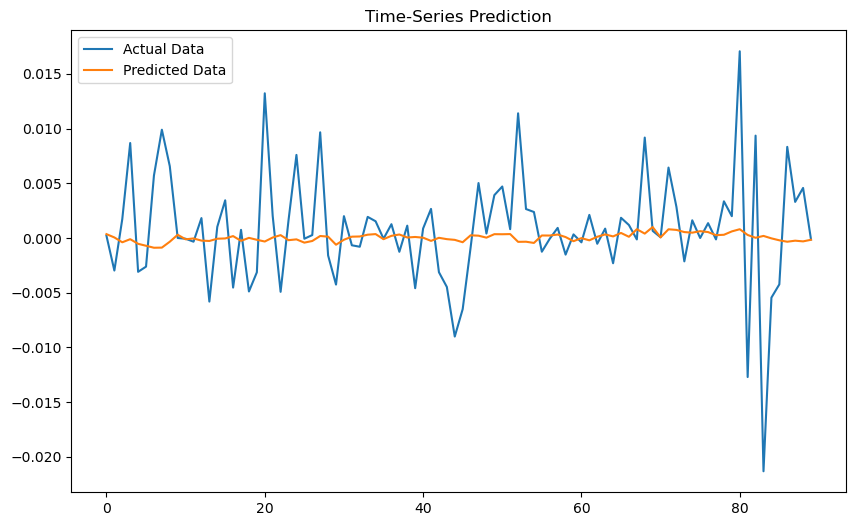

377


In [131]:
true, preds = [], []
for i in range(len(dataY_plot) - 90, len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(len(dataY_plot) - 90, len(data_predict)):
    preds.append(data_predict[i][0])
plt.figure(figsize=(10,6)) #plotting
# plt.axvline(x=train_test_cutoff, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show() 
print(len(dataY_plot)-train_test_cutoff)

In [ ]:
true, preds = [], []
for i in range(len(dataY_plot) - 90, len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(len(dataY_plot) - 90, len(data_predict)):
    preds.append(data_predict[i][0:18])
plt.figure(figsize=(10,6)) #plotting
# plt.axvline(x=train_test_cutoff, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show() 
print(len(dataY_plot)-train_test_cutoff)